# Segmentação de imagens de varredura eletrônica 
* Primeiro é usada uma técnica de **Equalização de histograma** para melhorar o contraste da imagem.
  * [Create CLAHE](https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html)
* Na segunda étapa são testados dois algoritmos de segmentação.
  * [ADAPTIVE Thresholding](https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html)
* Por fim são usadas técnicas de morfologia para melhorar a segmentação.
  * [Dilation e Erosion](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html)

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Função para plotar as imagens lado a lado

In [4]:
def image_plot(img, seg_img, titulo):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    seg_img = cv2.cvtColor(seg_img, cv2.COLOR_BGR2RGB)

    fig, ax1 = plt.subplots(1, 2, figsize=(12, 8))
    plt.tight_layout()
    fig.suptitle(titulo[0])
    ax1[0].set_title(titulo[1])
    ax1[1].set_title(titulo[2])
    ax1[0].imshow(img)
    ax1[1].imshow(seg_img)
    
    plt.show()

### Lendo a imagem e melhorando o contraste da mesma

In [6]:
img = cv2.imread("migro.png") # Lendo a imagem
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Tranformando em escala de cinsar 1 canal
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8)) # Criando o objeto de equalização
cl1 = clahe.apply(gray_image) # Aplicando o equalizador na imagem 

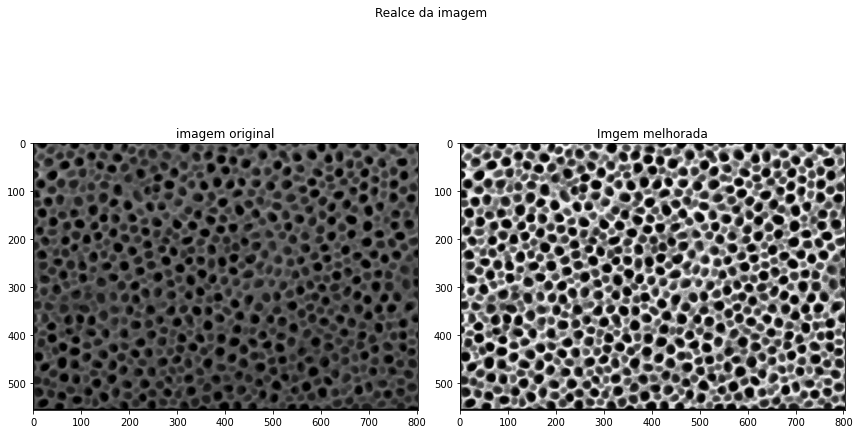

In [7]:
# Plotando a imagem normal do lado da imagem com o contraste melhorado
image_plot(img, cl1, ["Realce da imagem", "imagem original" , "Imgem melhorada"])

In [9]:
output_adapthresh = cv2.adaptiveThreshold(cl1, 255.0,
		cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 1)


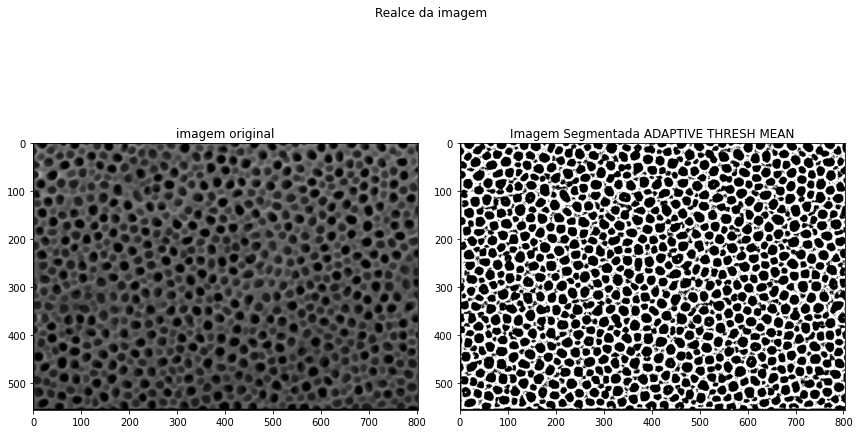

In [10]:
image_plot(img, output_adapthresh, ["Realce da imagem", "imagem original" , "Imagem Segmentada ADAPTIVE THRESH MEAN"])

In [73]:

output_adapthresh_2 = cv2.adaptiveThreshold(cl1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

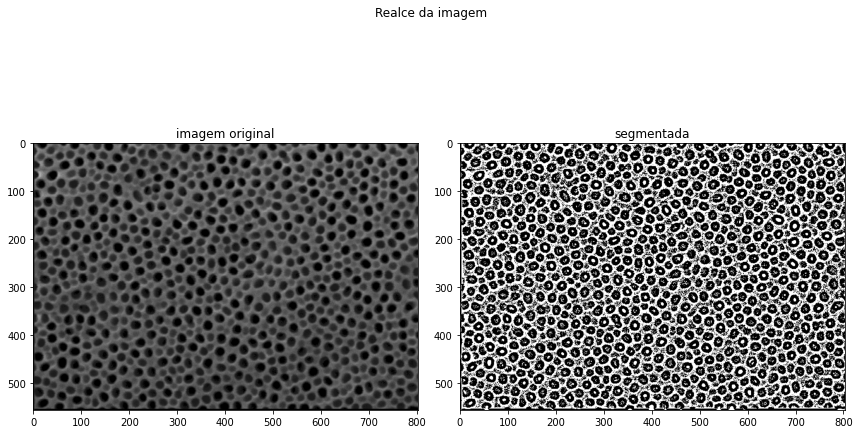

In [74]:
image_plot(img, output_adapthresh_2, ["Realce da imagem", "imagem original" , "Imagem segmentada"])

In [87]:
# sure background area
kernel = np.ones((2,2),np.uint8)
opening = cv2.morphologyEx(output_adapthresh_2, cv2.MORPH_OPEN, kernel)

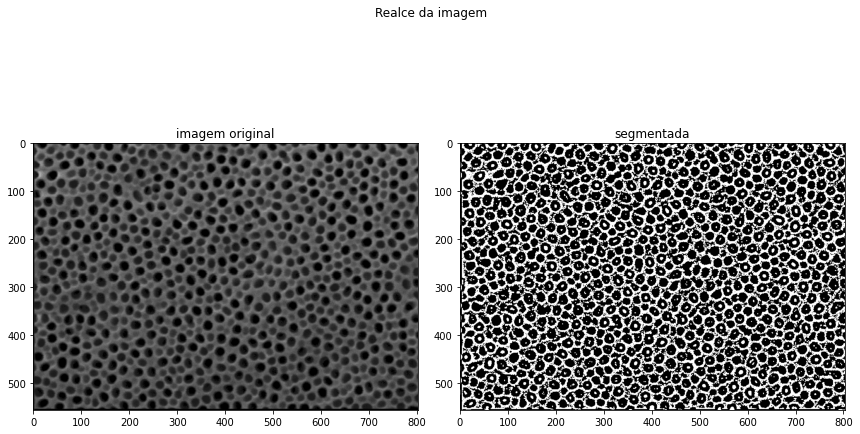

In [88]:
image_plot(img, opening, ["Realce da imagem", "imagem original" , "segmentada"])

In [89]:
dilata = cv2.dilate(opening, kernel, iterations=1)

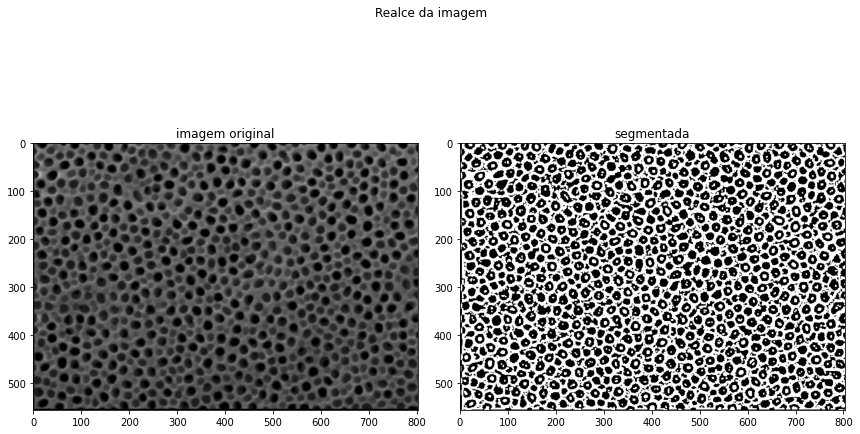

In [90]:
image_plot(img, dilata, ["Realce da imagem", "imagem original" , "segmentada"])

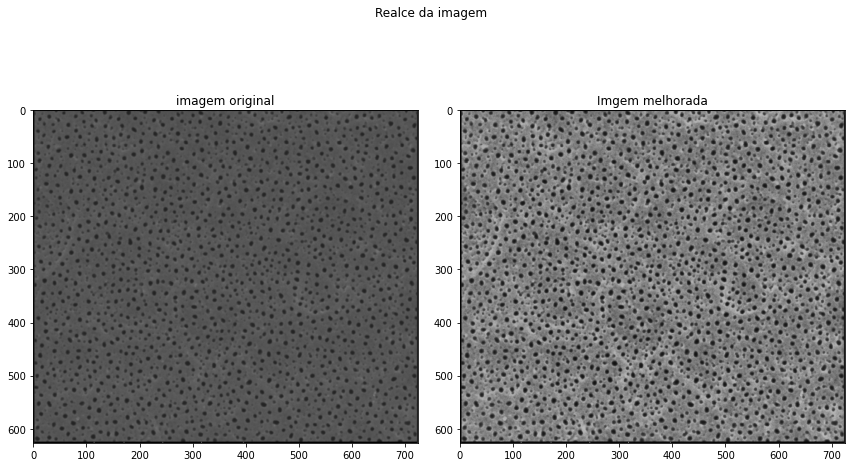

In [91]:
img = cv2.imread("migro_2.png")
#create a CLAHE object (Arguments are optional).
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
cl1 = clahe.apply(gray_image)
image_plot(img, cl1, ["Realce da imagem", "imagem original" , "Imgem melhorada"])

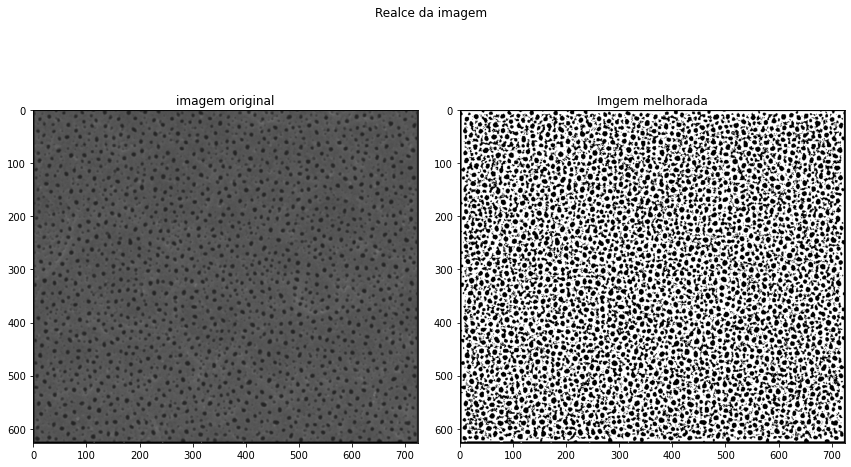

In [93]:
output_adapthresh = cv2.adaptiveThreshold(cl1, 255.0,
		cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 1)
image_plot(img, output_adapthresh, ["Realce da imagem", "imagem original" , "Imgem melhorada"])